In [47]:
import numpy as np
import pandas as pd

import logistic_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

np.random.seed(44) # for comparison of results


# Comparison of different optimization methods for logistic regression

In the following notebook, we will compare different optimization methods for logistic regression. We will use one generated dataseta along with many real datasets. We will compare the following optimization methods:
- IWLS (Iteratively Reweighted Least Squares)
- SGD (Stochastic Gradient Descent)
- ADAM (Adaptive Moment Estimation)

We will also compare the performance of the optimization methods using interactions between features and without.

The parameters of the optimization methods are choosen to be default for each method:

## Stopping criterion

To make a comparison fair, we propose the same stopping rule for each algorithm.
We will stop the optimization when the values of the gradient are less than 1^{-3} or when the number of iterations is greater than 100.

CONSIDER DIFFERENT STOPPING RULES

In [72]:
def compare_methods(X, y, algorithms = ["iwls", "sgd", "adam"], k = 10, test_size = 0.2, interaction = False):
    balanced_accuracies = {}
    interaction_opt = [False]
    if interaction:
        interaction_opt.append(True)

    for alg in algorithms:
        
        print(f"Using algorithm: {alg}" + (" with interactions" if interaction else ""))
        for inter in interaction_opt:
            alg_name = alg + ("_inter" if inter else "")
            balanced_accuracies[alg_name] = []
            for i in range(k):
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
                model = logistic_regression.LogisticRegressor(descent_algorithm = alg, include_interactions = inter)
                if alg == "iwls":
                    model.fit(X_train, y_train, max_num_epoch = 10, tolerance=1e-3)
                else:
                    model.fit(X_train, y_train, max_num_epoch = 1000, tolerance=1e-3)
                balanced_accuracies[alg_name].append(model.balanced_accuracy(X_test, y_test))
                print(f"Balanced accuracy: {balanced_accuracies[alg_name][-1]}")
            print(f"Mean accuracy: {np.mean(balanced_accuracies[alg_name])}")
    balanced_accuracies = pd.DataFrame(balanced_accuracies)
    return balanced_accuracies

## Datasets

### artificial data

In [37]:
import numpy as np
from scipy.special import expit as sigmoid
n = 1000

a = 10

# Generate y observations from the binomial distribution
y = np.random.binomial(1, 0.5, size=n)

true_beta = np.array([5, 3])

X = np.random.normal(size = (n, 2))

y = np.random.binomial(1, sigmoid(X @ true_beta))

np.mean(y)

0.498

In [53]:
df = compare_methods(X, y)

Using algorithm: iwls
Balanced accuracy: 0.9356684062625451
Balanced accuracy: 0.8959563607246521
Balanced accuracy: 0.9250425042504251
Balanced accuracy: 0.9308270676691729
Balanced accuracy: 0.88981678307521
Mean accuracy: 0.915462224396401
Using algorithm: sgd
Balanced accuracy: 0.8987520128824477
Balanced accuracy: 0.9017543859649123
Balanced accuracy: 0.9046474358974359
Balanced accuracy: 0.8921868625050999
Balanced accuracy: 0.9046474358974359
Mean accuracy: 0.9003976266294664
Using algorithm: adam
Balanced accuracy: 0.9189026228519747
Balanced accuracy: 0.9152661064425771
Balanced accuracy: 0.855
Balanced accuracy: 0.9027735905939102
Balanced accuracy: 0.8759398496240601
Mean accuracy: 0.8935764339025043


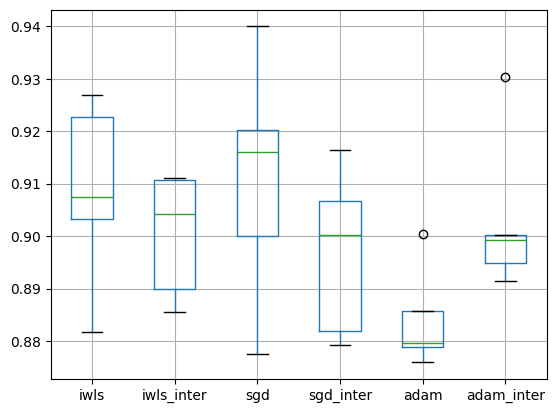

In [52]:
df.boxplot()
plt.show()

### synthetic data with interactions

In [63]:
import numpy as np
from scipy.special import expit as sigmoid
n = 1000

a = 10

# Generate y observations from the binomial distribution
y = np.random.binomial(1, 0.5, size=n)

true_beta = np.array([0.1, 0.1, 5])

X = np.random.normal(size = (n, 2))
X_with_interactions = np.hstack([X, X[:, 0].reshape(-1, 1) * X[:, 1].reshape(-1, 1)])

y = np.random.binomial(1, sigmoid(X_with_interactions @ true_beta))

np.mean(y)

0.493

In [64]:
df = compare_methods(X, y, interaction = True)

Using algorithm: iwls with interactions
Balanced accuracy: 0.43467386954781917
Balanced accuracy: 0.41859185918591857
Balanced accuracy: 0.41500000000000004
Balanced accuracy: 0.5499042242161508
Balanced accuracy: 0.5105263157894737
Mean accuracy: 0.46573925374787245
Balanced accuracy: 0.8212121212121213
Balanced accuracy: 0.7863307908470494
Balanced accuracy: 0.8080200501253132
Balanced accuracy: 0.8205128205128205
Balanced accuracy: 0.7841521717017597
Mean accuracy: 0.8040455908798126
Using algorithm: sgd with interactions
Balanced accuracy: 0.5403161264505802
Balanced accuracy: 0.45698051948051943
Balanced accuracy: 0.5586109995985549
Balanced accuracy: 0.47483766233766234
Balanced accuracy: 0.45255730157141427
Mean accuracy: 0.49666052188774623
Balanced accuracy: 0.8298829882988299
Balanced accuracy: 0.8413807065492458
Balanced accuracy: 0.8058752877589831
Balanced accuracy: 0.7705082032813125
Balanced accuracy: 0.7848557692307692
Mean accuracy: 0.8065005910238281
Using algorithm: 

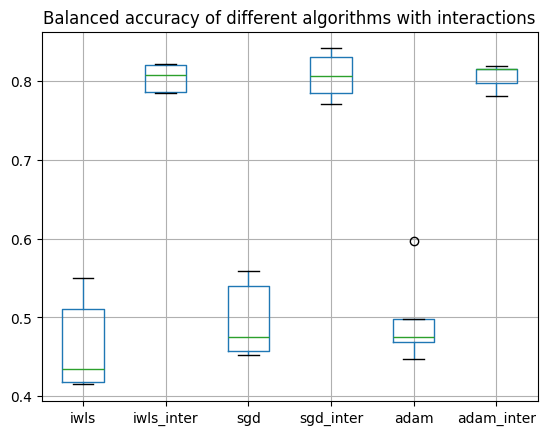

In [67]:
df.boxplot()
plt.title("Balanced accuracy of different algorithms with interactions")
plt.show()


### AIDS dataset

In [68]:
aids = pd.read_csv('data/aids.csv')

y = aids['target']
X = aids.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [73]:
aids = compare_methods(X, y)

Using algorithm: iwls
Balanced accuracy: 0.776074016563147
Balanced accuracy: 0.7147914032869784
Balanced accuracy: 0.8536831969186327
Balanced accuracy: 0.7977495317920851
Balanced accuracy: 0.23200329667206637
Balanced accuracy: 0.7913208228076507
Balanced accuracy: 0.7655460266736231
Balanced accuracy: 0.6905836165475214
Balanced accuracy: 0.7653133903133903
Balanced accuracy: 0.7906097560975609
Mean accuracy: 0.7177675057672657
Using algorithm: sgd
Balanced accuracy: 0.5755968169761273
Balanced accuracy: 0.752662037037037
Balanced accuracy: 0.8047560975609755
Balanced accuracy: 0.7166185492601949
Balanced accuracy: 0.5930212117660846
Balanced accuracy: 0.7910530246452576
Balanced accuracy: 0.7213769860375542
Balanced accuracy: 0.5378557612600166
Balanced accuracy: 0.5395164200649585
Balanced accuracy: 0.662630579297246
Mean accuracy: 0.6695087483905452
Using algorithm: adam
Balanced accuracy: 0.7706707317073171
Balanced accuracy: 0.5357142857142857
Balanced accuracy: 0.704081632653

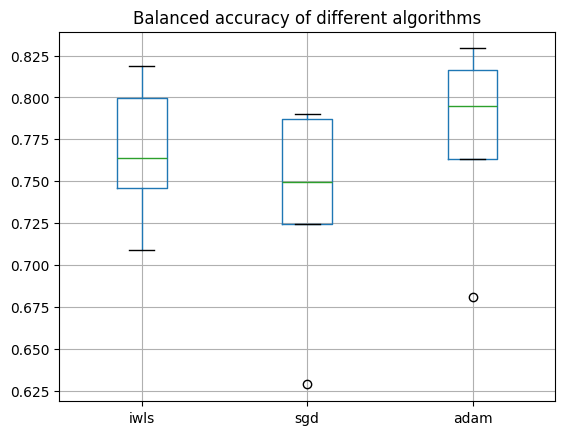

In [71]:
aids.boxplot()
plt.title("Balanced accuracy of different algorithms")
plt.show()

## Blood


In [74]:
blood = pd.read_csv('data/blood.csv')

y = blood['target']
X = blood.drop('target', axis=1)

blood = compare_methods(X, y)

Using algorithm: iwls
Balanced accuracy: 0.6041666666666666
Balanced accuracy: 0.6555451127819549
Balanced accuracy: 0.6947402738535101
Balanced accuracy: 0.47685185185185186
Balanced accuracy: 0.50046992481203
Balanced accuracy: 0.6791666666666667
Balanced accuracy: 0.5718725718725719
Balanced accuracy: 0.48799765807962525
Balanced accuracy: 0.5368332934704616
Balanced accuracy: 0.4299731460442057
Mean accuracy: 0.5637617166099544
Using algorithm: sgd
Balanced accuracy: 0.5
Balanced accuracy: 0.5
Balanced accuracy: 0.6435381355932204
Balanced accuracy: 0.649967398391654
Balanced accuracy: 0.682952182952183
Balanced accuracy: 0.5394736842105263
Balanced accuracy: 0.5119047619047619
Balanced accuracy: 0.5
Balanced accuracy: 0.5
Balanced accuracy: 0.5634095634095635
Mean accuracy: 0.5591245726461909
Using algorithm: adam
Balanced accuracy: 0.5852272727272727
Balanced accuracy: 0.7034090909090909
Balanced accuracy: 0.682952182952183
Balanced accuracy: 0.5131578947368421
Balanced accuracy:

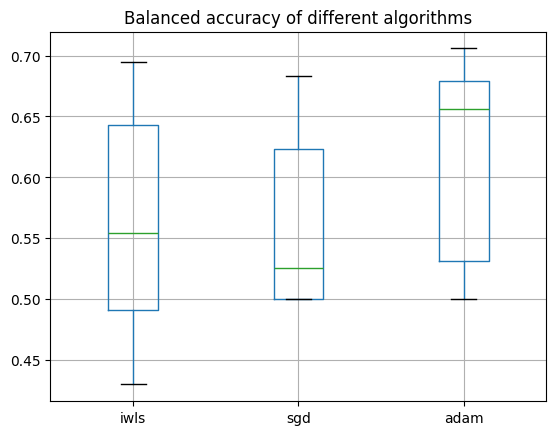

In [75]:
blood.boxplot()
plt.title("Balanced accuracy of different algorithms")
plt.show()